{'RFL': [47, 24, 5], 'netdev': [110, 117, 83], 'ebpf': [43, 39, 8], 'io_uring': [8, 8, 7]}


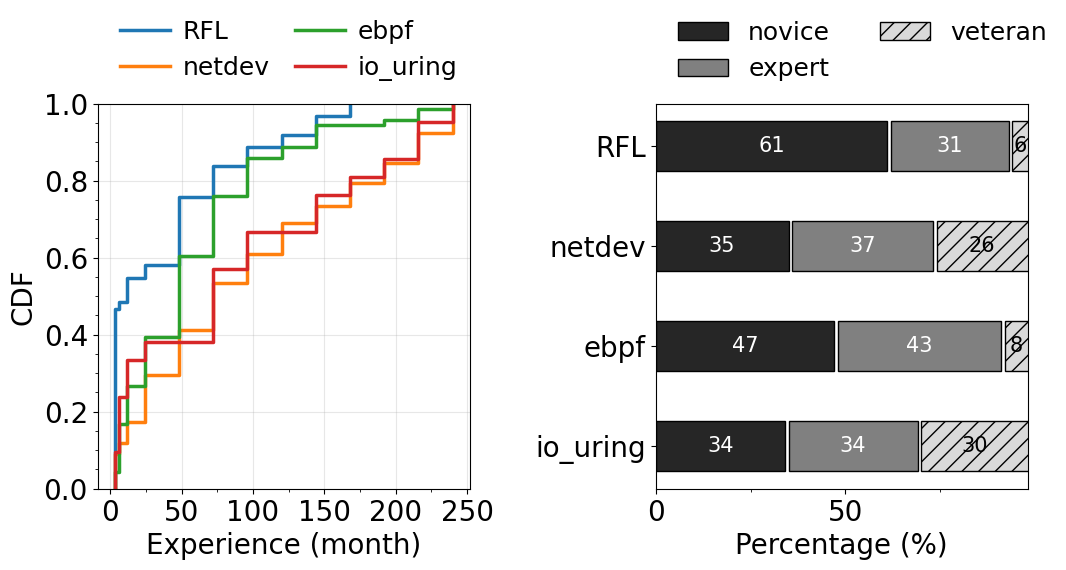

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.pyplot import MultipleLocator

def dup(A,B):
    C = []
    if len(A) != len(B):
        return C
    for i in range(len(A)):
        times = A[i]
        for j in range(times):
            C.append(B[i])
    return C

commit_count = [[29, 1, 4, 2, 11, 5, 3, 2, 3, 2, 0, 0, 0],
[24, 8, 14, 33, 31, 33, 20, 21, 12, 16, 14, 21, 20],
[3, 9, 7, 9, 15, 11, 7, 2, 4, 0, 1, 2, 1],
[2, 3, 2, 1, 0, 4, 2, 0, 2, 1, 1, 2, 1]]
time_line = [0,3,6,12,24,48,72,96,120,144,168,192,216,240]
young_index = 4
mid_index = 8
labels = ["RFL",
"netdev", 
"ebpf",
"io_uring"]
dup_time_line = []
# percent_commit_count = []
for i in range(len(commit_count)):
    # cur_commit_count = np.array(commit_count[i])
    # cur_commit_count = np.insert(cur_commit_count, 0, 0)
    # pcc = cur_commit_count / np.sum(cur_commit_count)
    # # print(pcc)
    # for j in range(1,len(pcc)):
    #     pcc[j] += pcc[j - 1]
    # percent_commit_count.append(pcc)
    dup_time_line.append(dup(commit_count[i], time_line[1:]))
# print(percent_commit_count)

fig, (ax, ax1) = plt.subplots(1,2,figsize=(12,5))
fig.subplots_adjust(wspace=0.5)

# draw ax
for j, time_line in enumerate(dup_time_line):
    ax.ecdf(time_line, label=labels[j], lw=2.5)

# for j, cc in enumerate(percent_commit_count):
#     # model = make_interp_spline(time_line, cc)
#     # y = model(time_line)
#     # print(y)
#     ax.plot(time_line, cc, label=labels[j], lw=2)
#     ax.set_xlabel('Experience (month)', size=20)
#     ax.set_ylabel('Percentage (%)', size=20)
#     ax.tick_params(labelsize=20)
#     ax.yaxis.set_major_locator(MultipleLocator(0.2))
#     ax.yaxis.set_minor_locator(MultipleLocator(0.05))
#     ax.xaxis.set_major_locator(MultipleLocator(50))
#     ax.xaxis.set_minor_locator(MultipleLocator(25))
#     ax.grid(alpha=0.3)
ax.set_xlabel('Experience (month)', size=20)
ax.set_ylabel('CDF', size=20)
ax.tick_params(labelsize=20)
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(MultipleLocator(25))
ax.grid(alpha=0.3)
ax.legend(ncol=2, frameon=False, bbox_to_anchor=(0,1), fontsize=18, columnspacing=1, handletextpad=0.5, loc='lower left')

# draw ax1
category_names = ['novice', 'expert', 'veteran']
result = {}
for k,line in enumerate(commit_count):
    new_list = []
    new_list.append(np.sum(np.array(line[:young_index + 1])))
    new_list.append(np.sum(np.array(line[young_index:mid_index + 1])))
    new_list.append(np.sum(np.array(line[mid_index:])))
    result[labels[k]] = new_list
print(result)
def survey(results, category_names, ax):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    for i, line in enumerate(data_cum):
        sum = line[2]
        data_cum[i] = line * 100/sum
        data[i] = data[i] * 100/sum
    category_colors = plt.colormaps['gist_gray'](
        np.linspace(0.15, 0.85, data.shape[1]))
    # category_colors = ['black', 'silver', 'white']
    hatchs = ['','','//']

    ax.invert_yaxis()
    ax.set_xlabel('Percentage (%)', size=20)
    # ax.xaxis.set_visible(False)
    ax.xaxis.set_major_locator(MultipleLocator(50))
    ax.xaxis.set_minor_locator(MultipleLocator(25))
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color, hatch) in enumerate(zip(category_names, category_colors, hatchs)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color, hatch=hatch, edgecolor='black', linewidth=1)
        r,g,b,_ = color
        text_color = ['white', 'white', 'black'] 
        ax.bar_label(rects, label_type='center', color=text_color[i], size=15)
    ax.legend(ncols=2, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=18, frameon=False)
    ax.tick_params(labelsize=20)

survey(results=result,category_names=category_names, ax=ax1)

plt.savefig('./figure9.pdf', dpi=100, bbox_inches='tight')  